In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pickle

In [2]:
df = pd.read_csv('medical_insurance.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df['sex'].replace({'male':1,'female':0},inplace =True)

In [7]:
df['smoker'].replace({'yes':1,'no':0},inplace =True)

In [8]:
df['region'].replace({'southeast':1,'southwest':2,'northeast':3,'northwest':4},inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


<AxesSubplot:xlabel='age'>

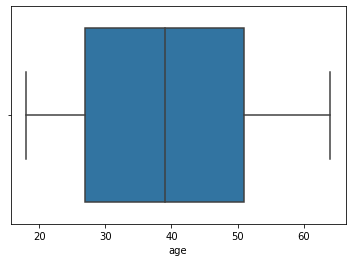

In [10]:
sns.boxplot(x=df['age'])

In [11]:
x = df.drop('charges',axis=1)
y = df['charges']

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [13]:
lin_model = LinearRegression()

In [14]:
lin_model.fit(x_train,y_train)

LinearRegression()

In [15]:
array = np.zeros(x.shape[1],dtype =int)

In [16]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,2,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,4,21984.47061
4,32,1,28.880,0,0,4,3866.85520


In [17]:
age =19
sex ='male'
bmi = 33
children = 2
smoker= 'yes'
region ='southeast'


In [18]:
sex_values={'male':1,'female':0}
smoker_values = {'yes':1,'no':0}
region_values ={'southeast':1,'southwest':2,'northeast':3,'northwest':4}

In [19]:
columns = x.columns

In [20]:
array[0]=age
array[1]=sex_values[sex]
array[2]=bmi
array[3]=children
array[4]=smoker_values[smoker]
array[5]=region_values[region]

In [21]:
lin_model.predict([array])

array([27914.87754151])

In [22]:
with open('model.pkl','wb') as f:
    pickle.dump(lin_model,f)

In [23]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,2,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,4,21984.47061
4,32,1,28.880,0,0,4,3866.85520
